In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/solarpowergeneration (2) (1).csv")

# Basic preview
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [2]:
df.shape

(2920, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [4]:
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [5]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [6]:
df.rename(columns={
    'distance-to-solar-noon': 'distance_to_solar_noon',
    'wind-direction': 'wind_direction',
    'wind-speed': 'wind_speed',
    'sky-cover': 'sky_cover',
    'average-wind-speed-(period)': 'average_wind_speed',
    'average-pressure-(period)': 'average_pressure',
    'power-generated': 'power_generated'
}, inplace=True)

In [7]:
df.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed',
       'average_pressure', 'power_generated'],
      dtype='object')

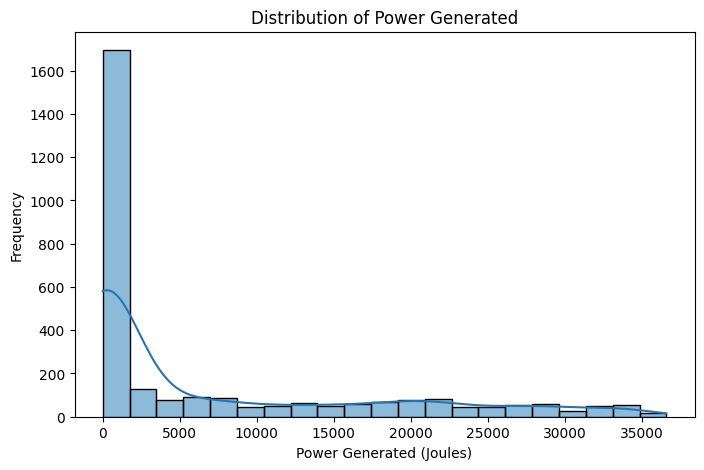

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["power_generated"], kde=True)
plt.title("Distribution of Power Generated")
plt.xlabel("Power Generated (Joules)")
plt.ylabel("Frequency")
plt.show()

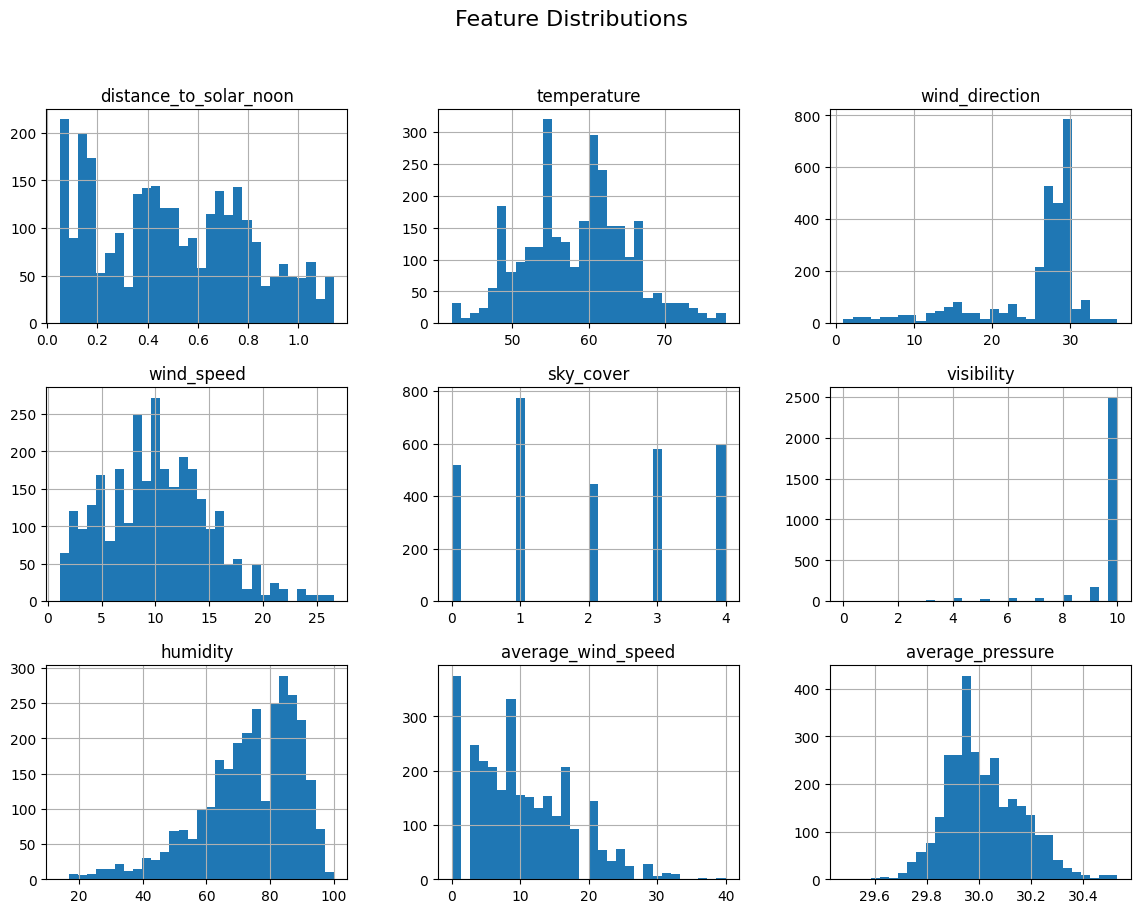

In [9]:
df.drop(columns=["power_generated"]).hist(
    figsize=(14,10),
    bins=30
)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

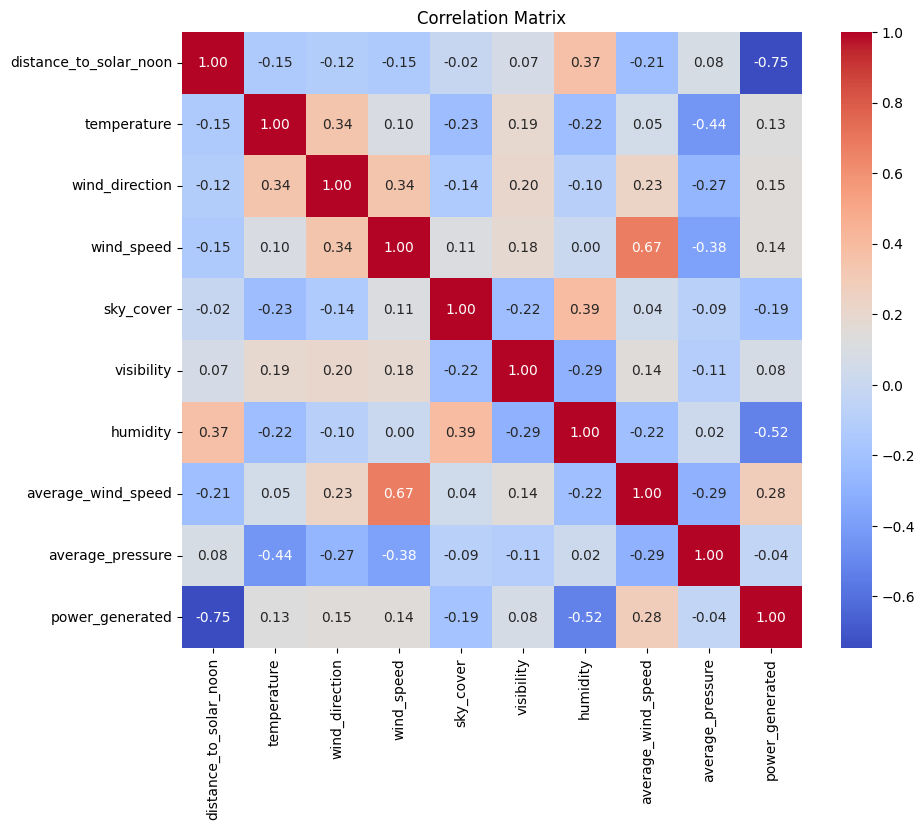

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

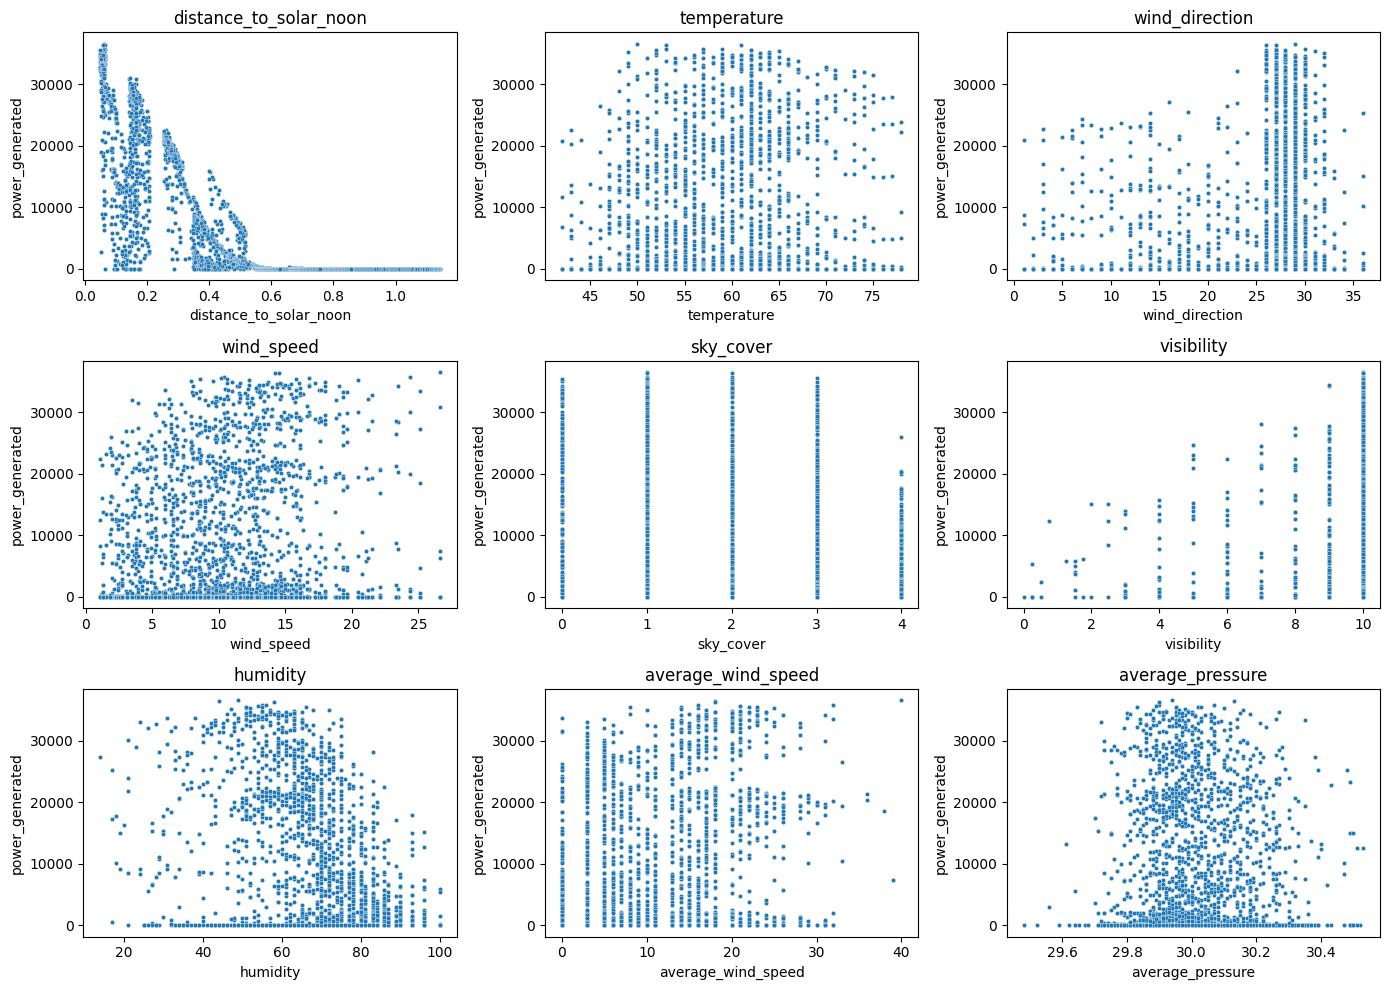

In [11]:
features = df.columns.drop("power_generated")

plt.figure(figsize=(14,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df["power_generated"], s=10)
    plt.title(col)

plt.tight_layout()
plt.show()

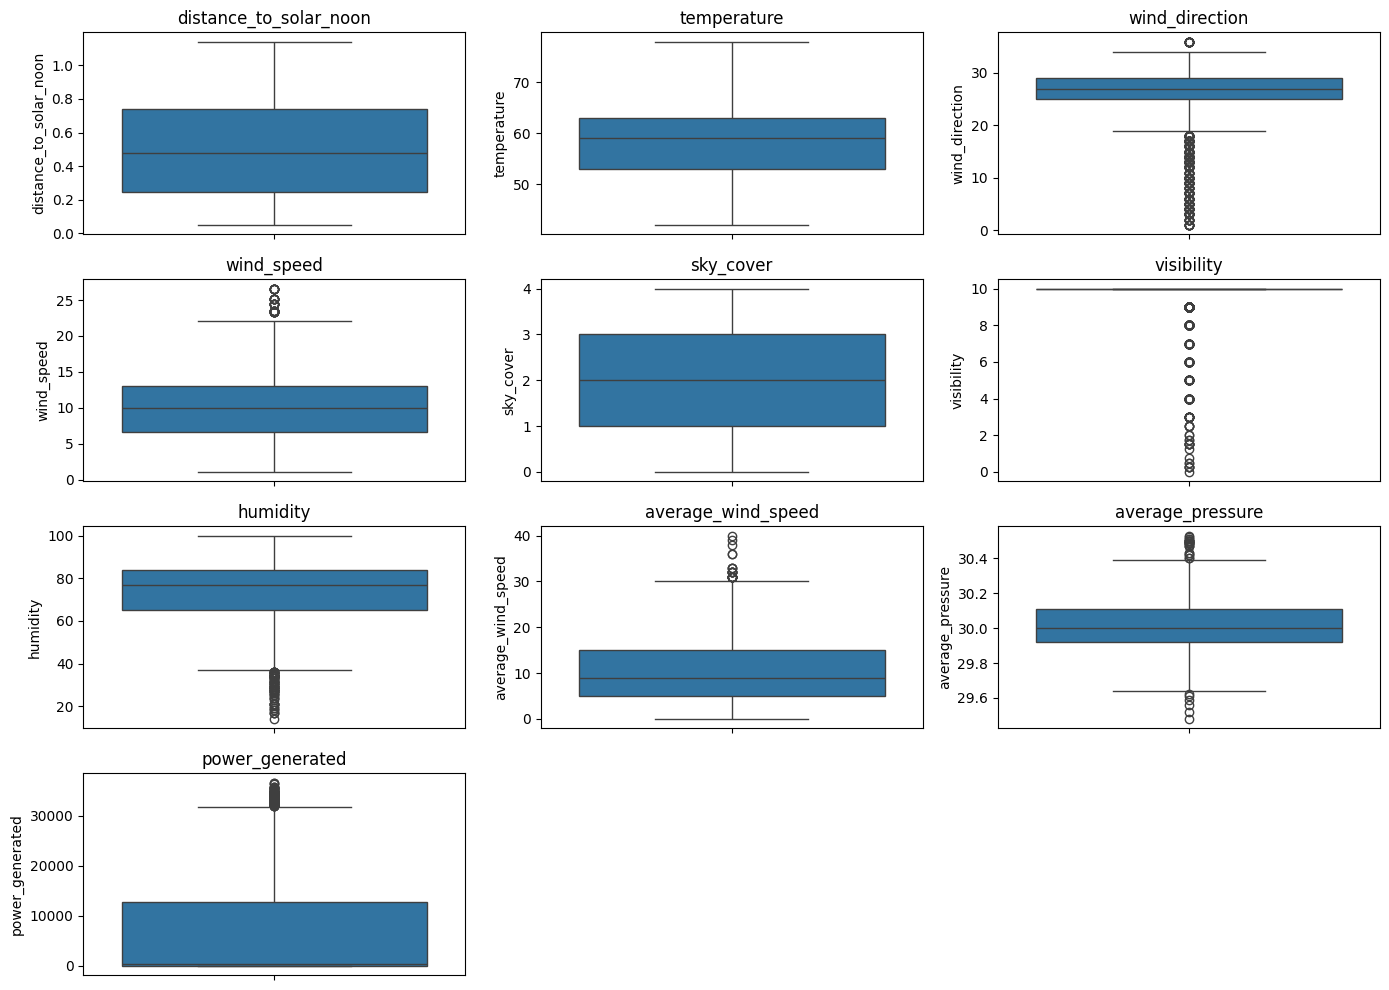

In [12]:
plt.figure(figsize=(14,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
df.skew().sort_values(ascending=False)

,0
power_generated,1.307035
average_wind_speed,0.622910
average_pressure,0.441384
wind_speed,0.416851
distance_to_solar_noon,0.211452
temperature,0.125916
sky_cover,0.080284
humidity,-0.955607
wind_direction,-1.629519
visibility,-3.862446


In [14]:
for col in df.columns.drop("power_generated"):
    corr = df[col].corr(df["power_generated"])
    print(f"{col} vs power_generated correlation: {corr:.3f}")

distance_to_solar_noon vs power_generated correlation: -0.747
temperature vs power_generated correlation: 0.132
wind_direction vs power_generated correlation: 0.147
wind_speed vs power_generated correlation: 0.143
sky_cover vs power_generated correlation: -0.187
visibility vs power_generated correlation: 0.077
humidity vs power_generated correlation: -0.523
average_wind_speed vs power_generated correlation: 0.278
average_pressure vs power_generated correlation: -0.037


In [15]:
# Interaction between solar position and sky condition
df["solar_exposure_index"] = (
    np.cos(df["distance_to_solar_noon"]) * (4 - df["sky_cover"])
)

# Wind energy influence
df["wind_energy_index"] = df["wind_speed"] * df["average_wind_speed"]

# Atmospheric density proxy
df["air_density_proxy"] = df["average_pressure"] / (df["temperature"] + 273.15)

df[["solar_exposure_index", "wind_energy_index", "air_density_proxy"]].head()

,solar_exposure_index,wind_energy_index,air_density_proxy
0,2.610062,60.0,0.087155
1,3.235560,37.5,0.087242
2,3.688634,0.0,0.087359
3,3.945140,0.0,0.087418
4,3.991409,22.5,0.087359


In [16]:
engineered_features = [
    "solar_exposure_index",
    "wind_energy_index",
    "air_density_proxy"
]

df[engineered_features + ["power_generated"]].corr()["power_generated"].sort_values(ascending=False)


,power_generated
power_generated,1.000000
solar_exposure_index,0.376802
wind_energy_index,0.245277
air_density_proxy,-0.125869


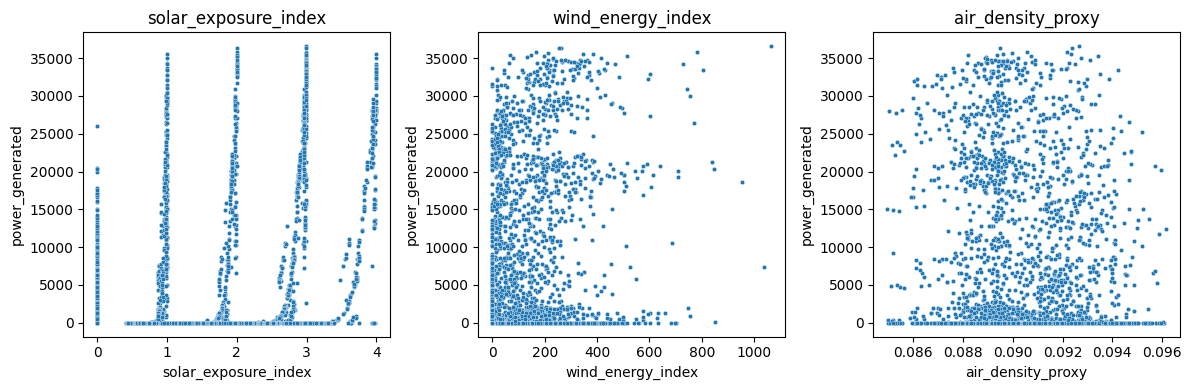

In [17]:
plt.figure(figsize=(12,4))

for i, col in enumerate(engineered_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df["power_generated"], s=10)
    plt.title(col)

plt.tight_layout()
plt.show()

In [18]:
df[engineered_features].var()

,0
solar_exposure_index,1.469652
wind_energy_index,17457.846800
air_density_proxy,0.000004


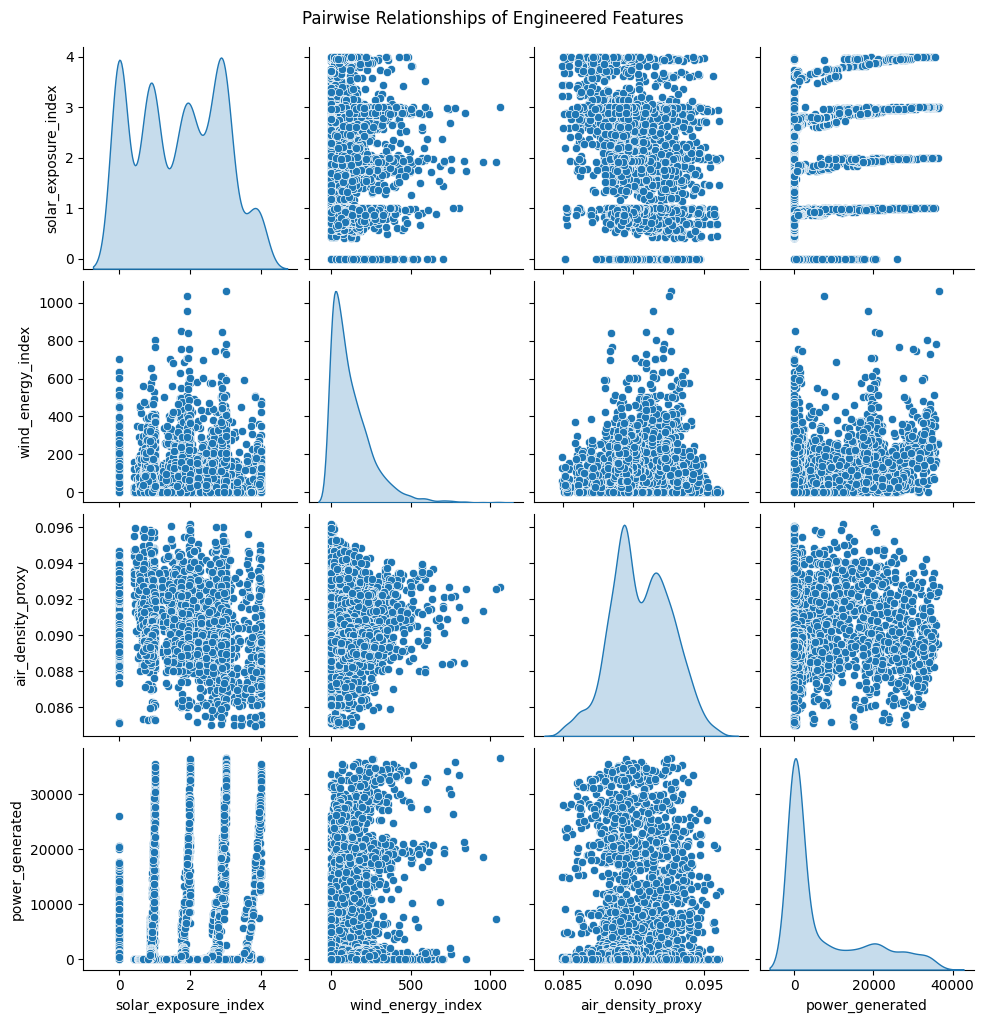

In [19]:
sns.pairplot(
    df[[
        "solar_exposure_index",
        "wind_energy_index",
        "air_density_proxy",
        "power_generated"
    ]],
    diag_kind="kde"
)
plt.suptitle("Pairwise Relationships of Engineered Features", y=1.02)
plt.show()

/tmp/ipython-input-2188968311.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby("solar_exposure_bin")["power_generated"].mean()


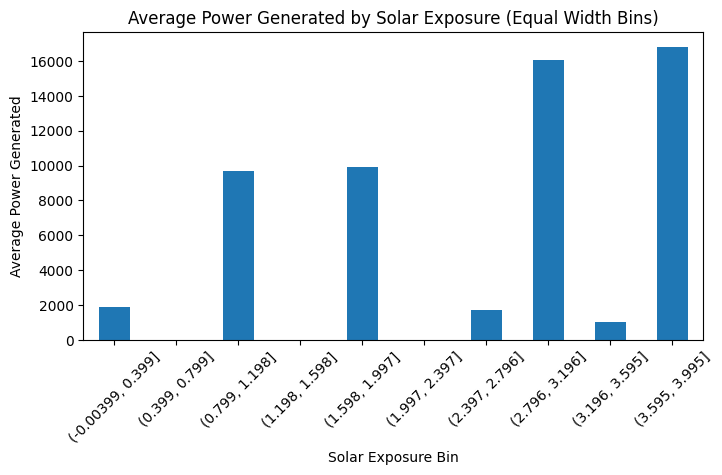

In [23]:
df["solar_exposure_bin"] = pd.cut(
    df["solar_exposure_index"],
    bins=10
)

bin_means = df.groupby("solar_exposure_bin")["power_generated"].mean()

plt.figure(figsize=(8,4))
bin_means.plot(kind="bar")
plt.title("Average Power Generated by Solar Exposure (Equal Width Bins)")
plt.xlabel("Solar Exposure Bin")
plt.ylabel("Average Power Generated")
plt.xticks(rotation=45)
plt.show()

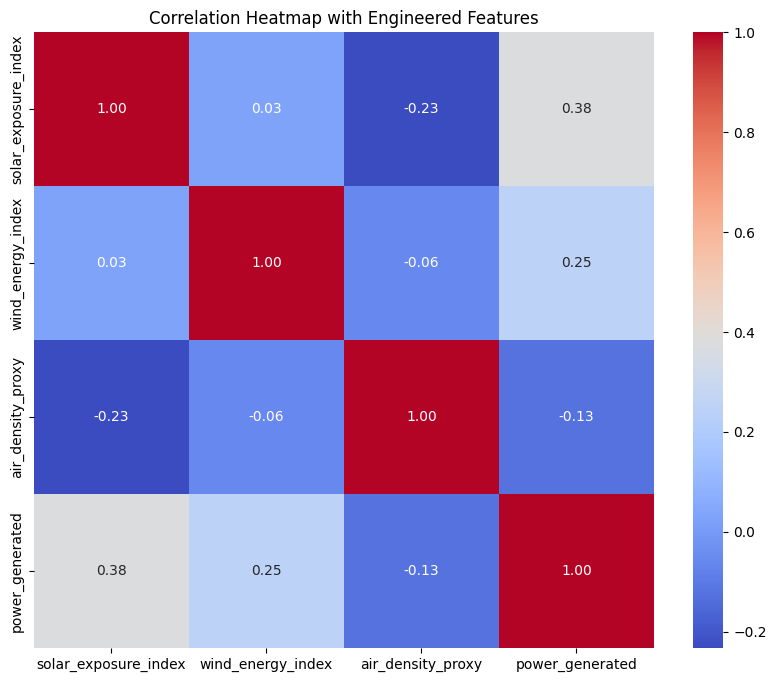

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[[
        "solar_exposure_index",
        "wind_energy_index",
        "air_density_proxy",
        "power_generated"
    ]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap with Engineered Features")
plt.show()

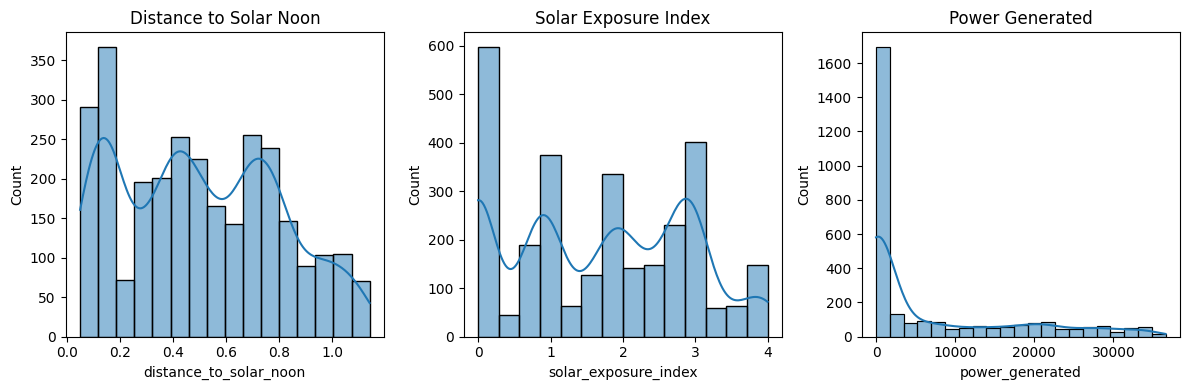

In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.histplot(df["distance_to_solar_noon"], kde=True)
plt.title("Distance to Solar Noon")

plt.subplot(1, 3, 2)
sns.histplot(df["solar_exposure_index"], kde=True)
plt.title("Solar Exposure Index")

plt.subplot(1, 3, 3)
sns.histplot(df["power_generated"], kde=True)
plt.title("Power Generated")

plt.tight_layout()
plt.show()

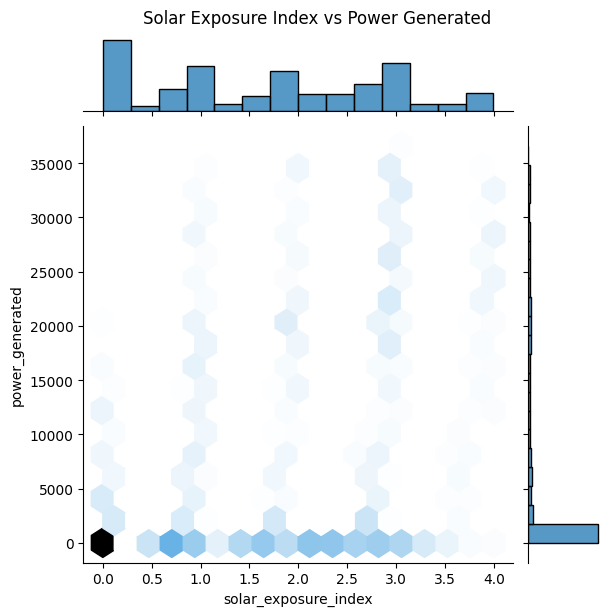

In [26]:
sns.jointplot(
    x=df["solar_exposure_index"],
    y=df["power_generated"],
    kind="hex",
    height=6
)
plt.suptitle("Solar Exposure Index vs Power Generated", y=1.02)
plt.show()

MODEL BUILDING

In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
eda_only_columns = ["solar_exposure_bin"]

X = df.drop(columns=["power_generated"] + eda_only_columns)
y = df["power_generated"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [46]:
imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [48]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [49]:
print("Linear Regression Performance")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²  :", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE : 4985.999673812581
RMSE: 6300.927901114045
R²  : 0.6230987160206055


In [50]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_imputed, y_train)

y_pred_rf = rf.predict(X_test_imputed)

In [51]:
print("Random Forest Performance")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²  :", r2_score(y_test, y_pred_rf))

Random Forest Performance
MAE : 1565.6225770547944
RMSE: 3434.82933320515
R²  : 0.8879971889509111


In [52]:
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train_imputed, y_train)

y_pred_gbr = gbr.predict(X_test_imputed)

In [53]:
print("Gradient Boosting Performance (Final Model)")
print("MAE :", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R²  :", r2_score(y_test, y_pred_gbr))

Gradient Boosting Performance (Final Model)
MAE : 1731.0422380933576
RMSE: 3302.307820142815
R²  : 0.8964729825259806


In [54]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting"
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr)
    ]
})

results

,Model,MAE,RMSE,R2
0,Linear Regression,4985.999674,6300.927901,0.623099
1,Random Forest,1565.622577,3434.829333,0.887997
2,Gradient Boosting,1731.042238,3302.307820,0.896473
